# Data of Alphabet Inc. (GOOG) stock
This data set contains information about Alphabet Inc. share prices. In this example, I will analyze data from 2010-2022 in terms of daily, monthly and annual stock price variations.

In [2]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* Loading Data of Alphabet Inc. (GOOG) stock - Historical Data

In [3]:
google = web.DataReader('GOOG', data_source = 'yahoo', start = '1/1/2010', end = '1/1/2022') # loading data
google = google.drop('Volume', axis = 1) # deleting column Vol
google.head()

,High,Low,Open,Close,Adj Close
Date,,,,,
2010-01-04,15.678981,15.547723,15.615220,15.610239,15.610239
2010-01-05,15.637387,15.480475,15.620949,15.541497,15.541497
2010-01-06,15.588072,15.102393,15.588072,15.149715,15.149715
2010-01-07,15.193053,14.760922,15.178109,14.797037,14.797037
2010-01-08,15.024933,14.672753,14.744733,14.994298,14.994298


### Daily Price Variation
* To calculate the daily variances I subtracted the open stock prices between highest and lowest stock price during specific day. In this way.

In [6]:
daily_shift = (google['High'] - google['Low'])
daily_shift = pd.DataFrame(data = daily_shift)
daily_shift.columns = ['Daily Price Variation']
daily_shift.head()

,Daily Price Variation
Date,
2010-01-04,0.131258
2010-01-05,0.156912
2010-01-06,0.485679
2010-01-07,0.432131
2010-01-08,0.352180


* here a different approach to the topic, subtracting the open stock values from consecutive days. First value is NaN because there is nothing to substract from. This values show how stock prices change between days.

In [4]:
ndaily_shift = (google['Open'] - google['Open'].shift(1))
ndaily_shift = pd.DataFrame(data = ndaily_shift)
ndaily_shift.columns = ['Daily Price Variation']
ndaily_shift.head()

,Daily Price Variation
Date,
2010-01-04,NaN
2010-01-05,0.005729
2010-01-06,-0.032877
2010-01-07,-0.409963
2010-01-08,-0.433376


* on the first day there is NaN value beacause there is nothing to substract from it

In [5]:
ndaily_shift = ndaily_shift.dropna()
ndaily_shift.head()

,Daily Price Variation
Date,
2010-01-05,0.005729
2010-01-06,-0.032877
2010-01-07,-0.409963
2010-01-08,-0.433376
2010-01-11,0.310337


### Monthly Price Variation
To calculate monthly variations, firstly I have grouped months and I subtracted the minimum share values from the maximum ones. Next I created dataframe with differences from Open column. Doing that I got variations between maximum and minimum stock price in particular months.

In [54]:
google.groupby(pd.Grouper(freq = 'M')).max() # monthly max values from every column
google.groupby(pd.Grouper(freq = 'M')).min() # monthly min values from every column

,High,Low,Open,Close,Adj Close
Date,,,,,
2010-01-31,269.484894,261.823608,267.980530,263.980530,263.980530
2010-02-28,263.258240,259.029083,262.575806,262.232086,262.232086
2010-03-31,265.649292,262.884644,263.611908,265.350403,265.350403
2010-04-30,266.416412,259.542175,263.487396,261.868439,261.868439
2010-05-31,237.833542,229.141129,233.200912,235.143631,235.143631
...,...,...,...,...,...
2021-08-31,2720.409912,2683.669922,2709.350098,2719.790039,2719.790039
2021-09-30,2711.800049,2660.000000,2686.500000,2665.310059,2665.310059
2021-10-31,2714.000000,2623.330078,2671.090088,2675.300049,2675.300049


In [55]:
month_difference = google.groupby(pd.Grouper(freq = 'M')).max() - google.groupby(pd.Grouper(freq = 'M')).min()
month_difference = pd.DataFrame(data = month_difference['Open'])
month_difference.columns = ['Monthly Price Variation']
month_difference.head()

,Monthly Price Variation
Date,
2010-01-31,44.438446
2010-02-28,10.077209
2010-03-31,29.359955
2010-04-30,31.491943
2010-05-31,29.076004


### Yearly Price Variation
* in this case approach is identical to the monthly variations.

In [56]:
year_difference = google.groupby(pd.Grouper(freq = 'A')).max() - google.groupby(pd.Grouper(freq = 'A')).min()
year_difference = pd.DataFrame(data = year_difference['Open'])
year_difference.columns = ['Yearly Price Variation']
year_difference.head()

,Yearly Price Variation
Date,
2010-12-31,95.487076
2011-12-31,84.059906
2012-12-31,104.792206
2013-12-31,207.063873
2014-12-31,115.470215


### Plots
* Visualize how stock price values change over specific periods of time.  
In the first step I had to make Date as a column to use it to make charts.

In [57]:
google = google.reset_index()
daily_shift = daily_shift.reset_index()
month_difference = month_difference.reset_index()
year_difference = year_difference.reset_index()
month_difference.head()

,Date,Monthly Price Variation
0,2010-01-31,44.438446
1,2010-02-28,10.077209
2,2010-03-31,29.359955
3,2010-04-30,31.491943
4,2010-05-31,29.076004


Text(0.5, 0, 'Year')

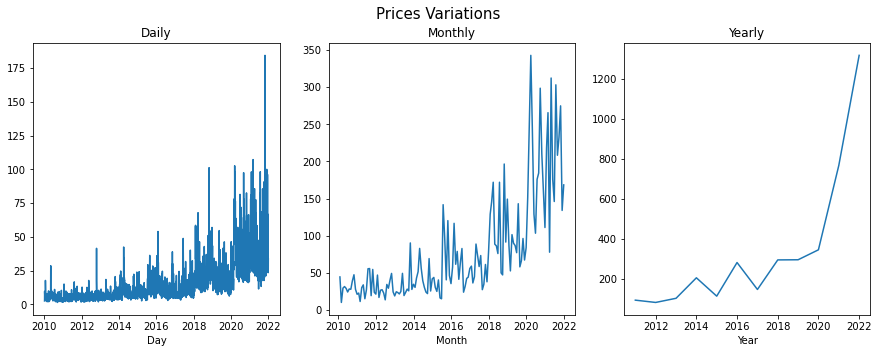

In [60]:
fig, axes = plt.subplots(nrows =1, ncols = 3, figsize = (15,5))
fig.suptitle('Prices Variations', size = 15)
axes[0].plot('Date', 'Daily Price Variation', data = daily_shift)
axes[0].set_title('Daily')
axes[0].set_xlabel('Day')
axes[1].plot('Date', 'Monthly Price Variation', data = month_difference)
axes[1].set_title('Monthly')
axes[1].set_xlabel('Month')
axes[2].plot('Date', 'Yearly Price Variation', data = year_difference)
axes[2].set_title('Yearly')
axes[2].set_xlabel('Year')